# 카카오톡 대화로 워드클라우드 만들기

### 1. 환경 만들기

패키지 설치

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'

폰트 검색

In [9]:
# 폰트 위치 출력, 원하는 폰트의 위치 복사하기

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Showcard Gothic C:\WINDOWS\Fonts\SHOWG.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Hancom Gothic C:\WINDOWS\Fonts\Hancom Gothic Bold.ttf
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
MS Gothic C:\Windows\Fonts\msgothic.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunbd.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothM.ttc
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Hancom Gothic C:\Windows\Fonts\Hancom Gothic Regular.ttf
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothL.ttc
Franklin Gothic Medium C:\Windows\Fonts\framdit.ttf
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICB.TTF


In [10]:
#font 변수에 위치 저장_맑은고딕 픽

font = "C:/WINDOWS/Fonts/malgunbd.ttf"

### 2. txt파일 불러오고 데이터로 쓰기

In [11]:
data = open("C:/Users/User/Desktop/KakaoTalk.txt", 'r', encoding='UTF8')  #'r'은 읽기만 하겠다

In [12]:
df = data.readlines()
list = []

for i in df:
    i=i.rstrip('\n')  #'\n'제거
    i=i.strip()  #띄어쓰기 제거
    list.append(i)

### 3. 데이터프레임으로 만들기

In [13]:
list

['정민영 님과 카카오톡 대화',
 '저장한 날짜 : 2021-03-13 15:43:29',
 '',
 '--------------- 2020년 9월 11일 금요일 ---------------',
 "[정민영] [오후 8:09] '넉아웃' 어때요? 배달의민족 앱에서 확인해보세요.",
 'https://baemin.me/KD5vE0ok9',
 '[정민영] [오후 8:21] 시켜드실?',
 '[정민영] [오후 8:21] 크로플',
 '[정민경] [오후 8:27] 나우..?',
 '[정민영] [오후 8:29] 응..',
 '[정민영] [오후 8:29] 디저트',
 '[정민영] [오후 8:56] 사진',
 '[정민영] [오후 8:56] 니 이거가?',
 '[정민경] [오후 9:04] 저 중에 하나겠지',
 '[정민영] [오후 9:04] 합격룰 50도안됨',
 '[정민영] [오후 9:04] 올~~',
 '[정민경] [오후 9:05] 크로플은...',
 '[정민영] [오후 9:05] 드실?',
 '[정민경] [오후 9:16] ㅇ ㅇ',
 '[정민영] [오후 9:16] 돈 반띵~뉴띵',
 '--------------- 2020년 9월 12일 토요일 ---------------',
 '[정민영] [오후 7:22] 저녁 뭐냐',
 '[정민경] [오후 9:13] 오동통',
 '[정민경] [오후 9:13] 양념한삼겹살',
 '[정민경] [오후 9:13] 잡채',
 '[정민영] [오후 9:13] 으응',
 '[정민영] [오후 9:13] 크로플><',
 '[정민영] [오후 9:35] 페북하지마시고 공부ㄱ',
 '--------------- 2020년 9월 13일 일요일 ---------------',
 '[정민영] [오후 7:23] ㅎㅇ',
 '[정민경] [오후 7:37] ㅂㅇ',
 '[정민영] [오후 7:37] 뭐먹음?',
 '--------------- 2020년 9월 14일 월요일 ---------------',
 '[정민영] [오전 1:00] 이 선물 어때요?(꺄아)',
 '

In [14]:
list_drop = list[4:]

In [15]:
col_names = ['words']

In [16]:
df = pd.DataFrame(list_drop, columns=col_names)
df

,words
0,[정민영] [오후 8:09] '넉아웃' 어때요? 배달의민족 앱에서 확인해보세요.
1,https://baemin.me/KD5vE0ok9
2,[정민영] [오후 8:21] 시켜드실?
3,[정민영] [오후 8:21] 크로플
4,[정민경] [오후 8:27] 나우..?
...,...
3472,[정민경] [오후 1:06] 이모티콘
3473,[정민영] [오후 1:06] ㅋㅋㄲㅋㄱㅇㅈ
3474,[정민영] [오후 1:07] 윤혜린한테 고맙다고 해라ㅋㅋㅋㅋㅋㄲㅋㅋ
3475,[정민영] [오후 1:07] 활용성갑 오지네


In [17]:
df['kakao'] = df['words'].apply(lambda x: re.sub('[^가-힣]',' ',x))  #한글표현을 제외한 것들을 공백으로 변환

In [18]:
df #kakao라는 새로운 피쳐에 한글표현만 담김

,words,kakao
0,[정민영] [오후 8:09] '넉아웃' 어때요? 배달의민족 앱에서 확인해보세요.,정민영 오후 넉아웃 어때요 배달의민족 앱에서 확인해보세요
1,https://baemin.me/KD5vE0ok9,
2,[정민영] [오후 8:21] 시켜드실?,정민영 오후 시켜드실
3,[정민영] [오후 8:21] 크로플,정민영 오후 크로플
4,[정민경] [오후 8:27] 나우..?,정민경 오후 나우
...,...,...
3472,[정민경] [오후 1:06] 이모티콘,정민경 오후 이모티콘
3473,[정민영] [오후 1:06] ㅋㅋㄲㅋㄱㅇㅈ,정민영 오후
3474,[정민영] [오후 1:07] 윤혜린한테 고맙다고 해라ㅋㅋㅋㅋㅋㄲㅋㅋ,정민영 오후 윤혜린한테 고맙다고 해라
3475,[정민영] [오후 1:07] 활용성갑 오지네,정민영 오후 활용성갑 오지네


### 4. 문장 쪼개기, count하기

- soynlp : 기존에 정리되지 않은 단어도 해당 데이터에서 자주 사용/출연하면 학습해서 중요 단어로 분리해줌
- tokenizer : 단어에서 중요도가 적은 부분을 삭제해줌

In [19]:
pip install soynlp 

Note: you may need to restart the kernel to use updated packages.


In [20]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(df['kakao'].values) 
words = word_extractor.extract()

training was done. used memory 0.137 Gb
all cohesion probabilities was computed. # words = 9
all branching entropies was computed # words = 1631
all accessor variety was computed # words = 1631


In [21]:
from soynlp.tokenizer import LTokenizer

from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)  #중요 키워드=L, 무의미= r

In [22]:
df['tokenizer'] = df['kakao'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) #r 삭제, 중요 키워드만 추리기
df['tokenizer']

0       [정민, 오후, 넉아웃, 어때요, 배달의민족, 앱에서, 확인해보세요]
1                                           []
2                               [정민, 오후, 시켜드실]
3                                [정민, 오후, 크로플]
4                                 [정민, 오후, 나우]
                         ...                  
3472                            [정민, 오후, 이모티콘]
3473                                  [정민, 오후]
3474                 [정민, 오후, 윤혜린한테, 고맙다고, 해라]
3475                       [정민, 오후, 활용성갑, 오지네]
3476                      [정민, 오후, 아, 무슨말인가했네]
Name: tokenizer, Length: 3477, dtype: object

In [23]:
#단어단위로 쪼개기

words = []
for i in df['tokenizer'].values:
    for k in i:
        words.append(k)
words

['정민',
 '오후',
 '넉아웃',
 '어때요',
 '배달의민족',
 '앱에서',
 '확인해보세요',
 '정민',
 '오후',
 '시켜드실',
 '정민',
 '오후',
 '크로플',
 '정민',
 '오후',
 '나우',
 '정민',
 '오후',
 '응',
 '정민',
 '오후',
 '디저트',
 '정민',
 '오후',
 '사진',
 '정민',
 '오후',
 '니',
 '이거가',
 '정민',
 '오후',
 '저',
 '중에',
 '하나겠지',
 '정민',
 '오후',
 '합격룰',
 '도안됨',
 '정민',
 '오후',
 '올',
 '정민',
 '오후',
 '크로플은',
 '정민',
 '오후',
 '드실',
 '정민',
 '오후',
 '정민',
 '오후',
 '돈',
 '반띵',
 '뉴띵',
 '년',
 '월',
 '일',
 '토요일',
 '정민',
 '오후',
 '저녁',
 '뭐냐',
 '정민',
 '오후',
 '오동통',
 '정민',
 '오후',
 '양념한삼겹살',
 '정민',
 '오후',
 '잡채',
 '정민',
 '오후',
 '으응',
 '정민',
 '오후',
 '크로플',
 '정민',
 '오후',
 '페북하지마시고',
 '공부',
 '년',
 '월',
 '일',
 '일요일',
 '정민',
 '오후',
 '정민',
 '오후',
 '정민',
 '오후',
 '뭐먹음',
 '년',
 '월',
 '일',
 '월요일',
 '정민',
 '오전',
 '이',
 '선물',
 '어때요',
 '꺄아',
 '오뚜기',
 '컵누들',
 '개',
 '매콤한맛',
 '우동맛',
 '택',
 '정민',
 '오전',
 '사줭',
 '정민',
 '오전',
 '사진',
 '장',
 '정민',
 '오전',
 '어',
 '첫번째',
 '개추억',
 '정민',
 '오전',
 '책사에',
 '과자',
 '개',
 '정민',
 '오전',
 '오른쪽은',
 '저금통임',
 '정민',
 '오전',
 '기억력',
 '정민',
 '오전',
 '사진',
 '장',
 '정민',
 '오전',
 '너무재

In [24]:
#키워드별 빈도 확인 -> Counter 이용

from collections import Counter
count = Counter(words)
words_dict = dict(count)
words_dict

{'정민': 3220,
 '오후': 2710,
 '넉아웃': 1,
 '어때요': 18,
 '배달의민족': 11,
 '앱에서': 11,
 '확인해보세요': 11,
 '시켜드실': 1,
 '크로플': 3,
 '나우': 1,
 '응': 14,
 '디저트': 2,
 '사진': 235,
 '니': 67,
 '이거가': 1,
 '저': 8,
 '중에': 3,
 '하나겠지': 1,
 '합격룰': 1,
 '도안됨': 1,
 '올': 5,
 '크로플은': 1,
 '드실': 3,
 '돈': 4,
 '반띵': 1,
 '뉴띵': 1,
 '년': 164,
 '월': 167,
 '일': 166,
 '토요일': 21,
 '저녁': 16,
 '뭐냐': 4,
 '오동통': 1,
 '양념한삼겹살': 1,
 '잡채': 1,
 '으응': 5,
 '페북하지마시고': 1,
 '공부': 2,
 '일요일': 22,
 '뭐먹음': 1,
 '월요일': 26,
 '오전': 512,
 '이': 13,
 '선물': 7,
 '꺄아': 8,
 '오뚜기': 1,
 '컵누들': 1,
 '개': 9,
 '매콤한맛': 1,
 '우동맛': 1,
 '택': 3,
 '사줭': 1,
 '장': 54,
 '어': 3,
 '첫번째': 2,
 '개추억': 1,
 '책사에': 1,
 '과자': 5,
 '오른쪽은': 1,
 '저금통임': 1,
 '기억력': 1,
 '너무재밌다': 1,
 '비밀의숲': 1,
 '하': 5,
 '돈주고': 1,
 '다음화사고싶음': 1,
 '내는': 3,
 '한번도': 2,
 '안봐서': 1,
 '베스트': 1,
 '컷': 1,
 '은': 2,
 '별론디': 1,
 '갬성': 1,
 '버거드실': 1,
 '어찌': 3,
 '주문할까': 1,
 '오빠야있나': 1,
 '어디시킬거': 1,
 '스테이지': 1,
 '포장할인': 1,
 '가기': 1,
 '귀찮기도하고': 1,
 '로위시키': 1,
 '까': 1,
 '있는것같은데': 1,
 '문닫혀잏어서': 1,
 '신발': 3,
 '모르겠': 1,
 '흰신발있음

In [25]:
#제거할 키워드 설정

stopword = {'정민', '오후', '오전', '사진', '저', '잘', '월', '일', '년', '장'}
for word in stopword:
    words_dict.pop(word)

### 5. 워드클라우드 생성

In [107]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = font,width=500, height=500, background_color='white').generate_from_frequencies(words_dict)

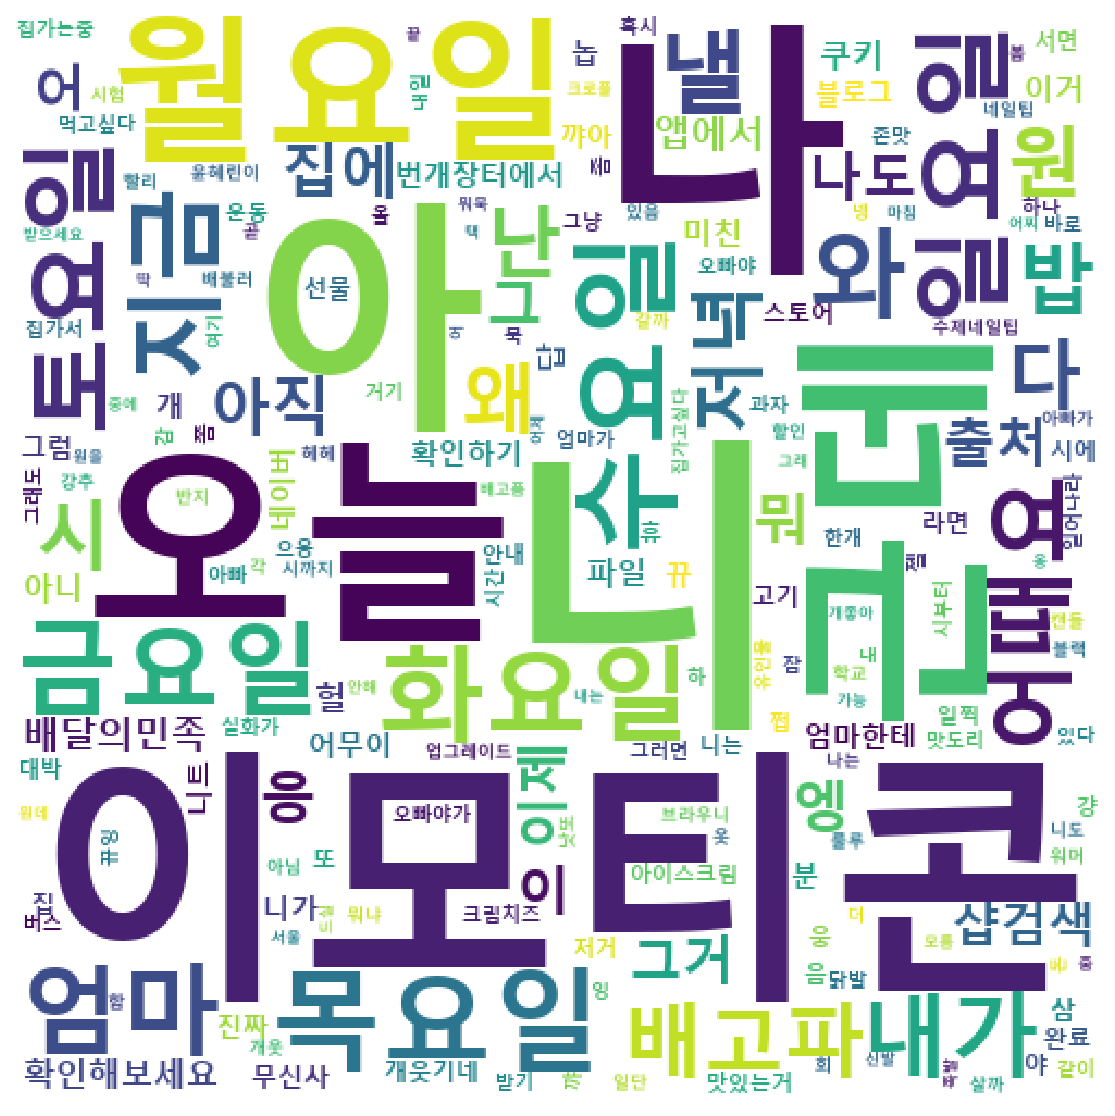

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')  #x,y축 없애기
plt.show()

### 6. 원하는 모양으로 워드클라우드 만들기

In [39]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

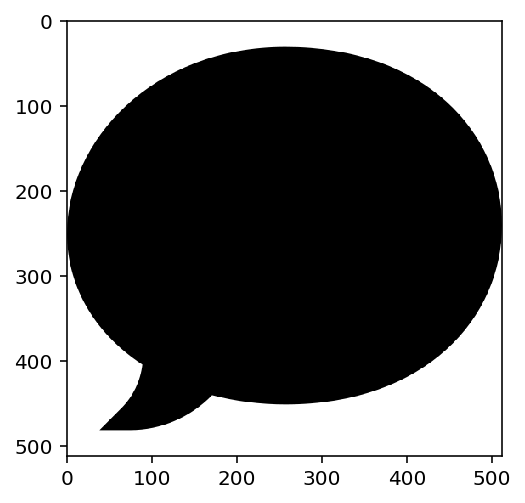

In [40]:
icon = Image.open('C:/Users/User/Desktop/bubble.png')
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255, 255,255))
mask.paste(icon, icon)
mask = np.array(mask)

In [50]:
wc = WordCloud(font_path=font, width=500, height=500, colormap = 'copper', background_color="yellow", mask=mask).generate_from_frequencies(words_dict)

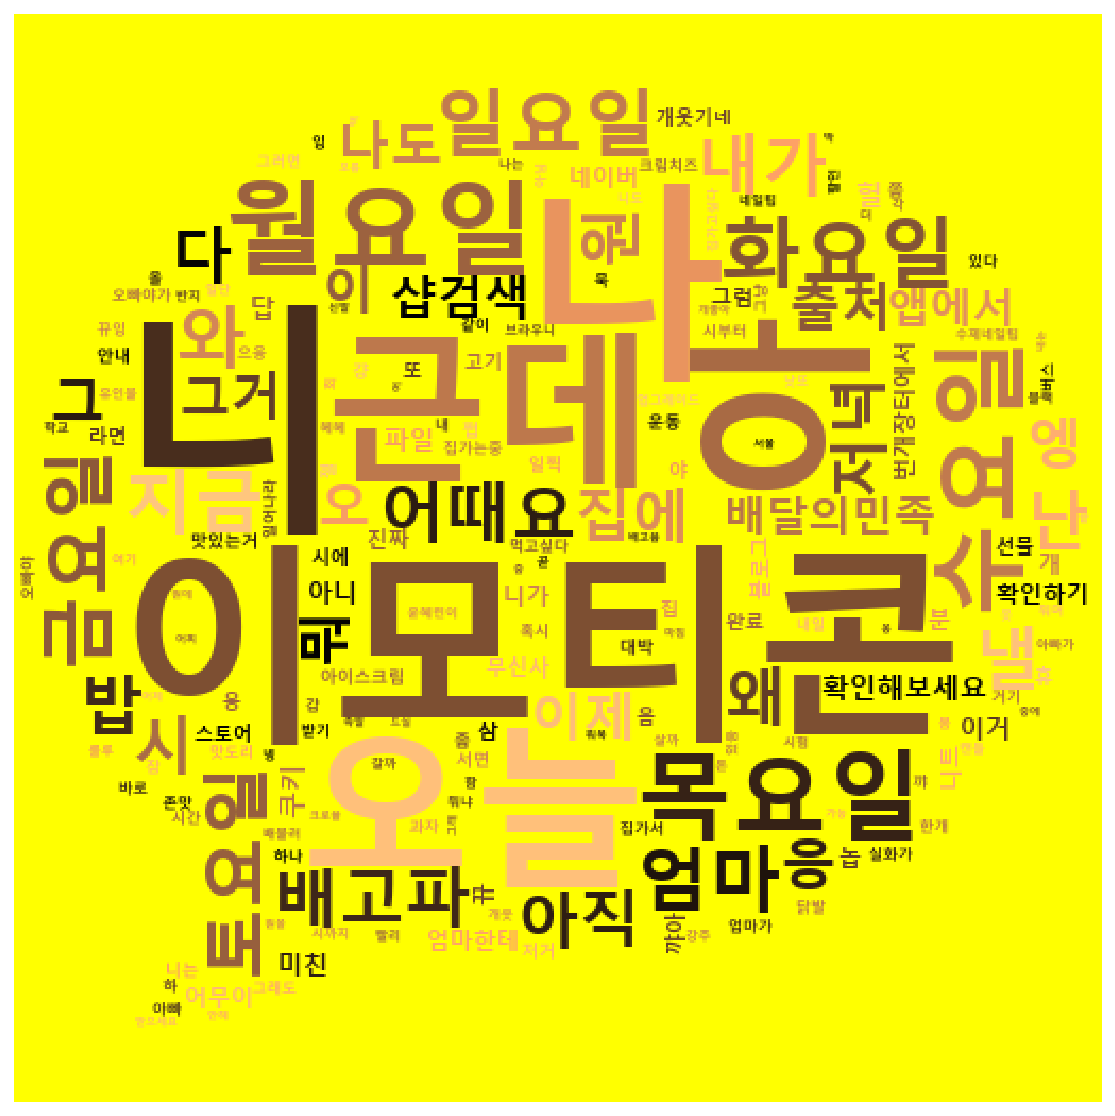

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()